# Regression

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)


In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from pycaret.datasets import get_data
concreteData = get_data('concrete')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Setup

In [ ]:
from pycaret.classification import *
s = setup(concreteData, target = 'strength', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 5)"
4,Transformed data shape,"(748, 5)"
5,Transformed train set shape,"(523, 5)"
6,Transformed test set shape,"(225, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import ClassificationExperiment and initialize the class
from pycaret.classification import ClassificationExperiment
classExperiment = ClassificationExperiment()

In [ ]:
# type check of the experiment
type(classExperiment)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
classExperiment.setup(concreteData, target = 'strength', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 5)"
4,Transformed data shape,"(748, 5)"
5,Transformed train set shape,"(523, 5)"
6,Transformed test set shape,"(225, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

# Compare models with OOP

classExperiment.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7746,0.7014,0.2679,0.5985,0.3535,0.2415,0.2768,0.2550
lda,Linear Discriminant Analysis,0.7745,0.7529,0.1442,0.5550,0.2229,0.1498,0.1933,0.0340
ridge,Ridge Classifier,0.7725,0.7528,0.0724,0.6667,0.1279,0.0890,0.1665,0.0380
lr,Logistic Regression,0.7705,0.7507,0.0397,0.5000,0.0736,0.0544,0.1164,0.6940
svm,SVM - Linear Kernel,0.7687,0.7516,0.0635,0.5333,0.1118,0.0726,0.1319,0.0340
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0340
gbc,Gradient Boosting Classifier,0.7575,0.6989,0.2846,0.4893,0.3505,0.2253,0.2434,0.1480
nb,Naive Bayes,0.7476,0.7125,0.2333,0.4906,0.2935,0.1642,0.1886,0.0360
rf,Random Forest Classifier,0.7443,0.6651,0.3327,0.4737,0.3806,0.2277,0.2379,0.2760
knn,K Neighbors Classifier,0.7364,0.6713,0.3013,0.4537,0.3531,0.1960,0.2073,0.0540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7746,0.7006,0.2679,0.5985,0.3535,0.2415,0.2768,0.1230
lda,Linear Discriminant Analysis,0.7745,0.7529,0.1442,0.5550,0.2229,0.1498,0.1933,0.0290
ridge,Ridge Classifier,0.7725,0.7529,0.0962,0.6083,0.1617,0.1089,0.1746,0.0300
lr,Logistic Regression,0.7688,0.7492,0.1603,0.5100,0.2407,0.1520,0.1857,0.0490
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0250
gbc,Gradient Boosting Classifier,0.7575,0.6985,0.2846,0.4893,0.3505,0.2253,0.2434,0.1320
nb,Naive Bayes,0.7476,0.7125,0.2333,0.4906,0.2935,0.1642,0.1886,0.0540
knn,K Neighbors Classifier,0.7441,0.6741,0.2910,0.4873,0.3478,0.2021,0.2206,0.0720
rf,Random Forest Classifier,0.7405,0.6666,0.3327,0.4610,0.3767,0.2204,0.2293,0.2180
lightgbm,Light Gradient Boosting Machine,0.7288,0.6672,0.2840,0.4119,0.3303,0.1691,0.1761,0.4650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

## Analyze Model

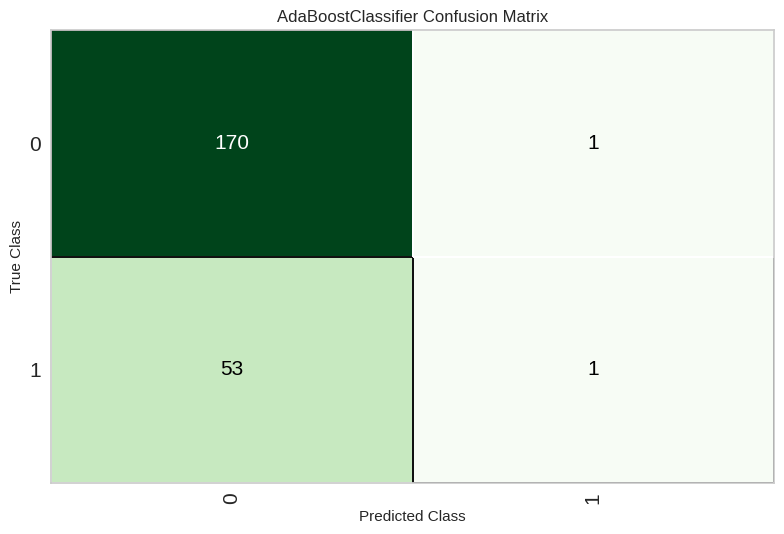

In [ ]:
plot_model(best, plot = 'residuals')

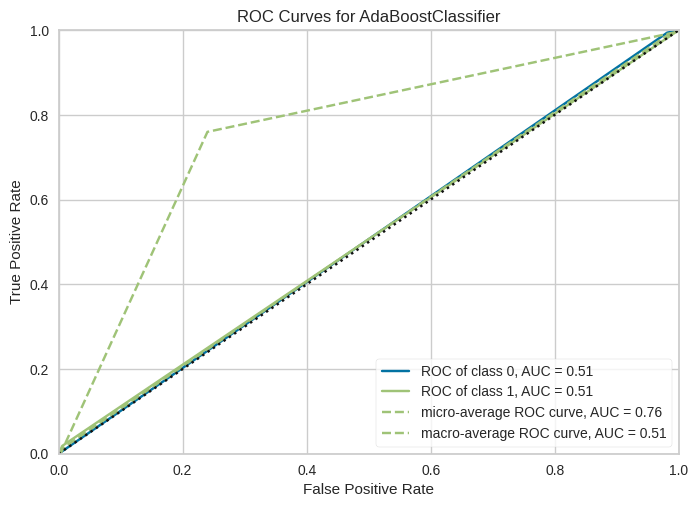

In [ ]:
# plot AUC
plot_model(best, plot = 'error')

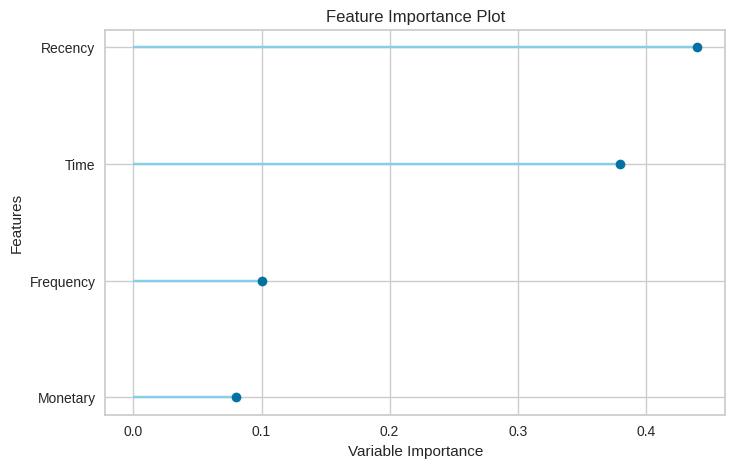

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7600,0.5063,0.0185,0.5000,0.0357,0.0189,0.0577


In [ ]:
# show predictions df
holdout_pred.head()

,Recency,Frequency,Monetary,Time,Class,prediction_label,prediction_score
484,23,1,250,23,0,0,0.507
567,4,9,2250,55,0,0,0.507
313,9,1,250,9,0,0,0.507
223,4,1,250,4,0,0,0.507
521,2,11,2750,41,1,0,0.507


In [ ]:
new_data = concreteData.copy()
new_data.drop('strength', axis=1, inplace=True)
new_data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Recency,Frequency,Monetary,Time,prediction_label,prediction_score
0,2,50,12500,98,0,0.5070
1,0,13,3250,28,1,0.5974
2,1,16,4000,35,0,0.5070
3,2,20,5000,45,0,0.5070
4,1,24,6000,77,0,0.5070


## Save Model

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Recency', 'Frequency', 'Monetary',
                                              'Time'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                   

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Recency', 'Frequency', 'Monetary',
                                             'Time'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 AdaBoostClassifier(algorithm='SAMME.R', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)

## Setup

In [ ]:
# init setup function
s = setup(concreteData, target = 'strength', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 5)"
4,Transformed data shape,"(748, 5)"
5,Transformed train set shape,"(523, 5)"
6,Transformed test set shape,"(225, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X_train_transformed')

,Recency,Frequency,Monetary,Time
626,9.0,9.0,2250.0,54.0
586,2.0,1.0,250.0,2.0
290,14.0,4.0,1000.0,23.0
739,23.0,4.0,1000.0,52.0
214,4.0,1.0,250.0,4.0
...,...,...,...,...
488,21.0,2.0,500.0,41.0
460,21.0,1.0,250.0,21.0
230,4.0,1.0,250.0,4.0
162,2.0,1.0,250.0,2.0


In [ ]:
s = setup(concreteData, target = 'strength', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 5)"
4,Transformed data shape,"(748, 5)"
5,Transformed train set shape,"(523, 5)"
6,Transformed test set shape,"(225, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


<Axes: >

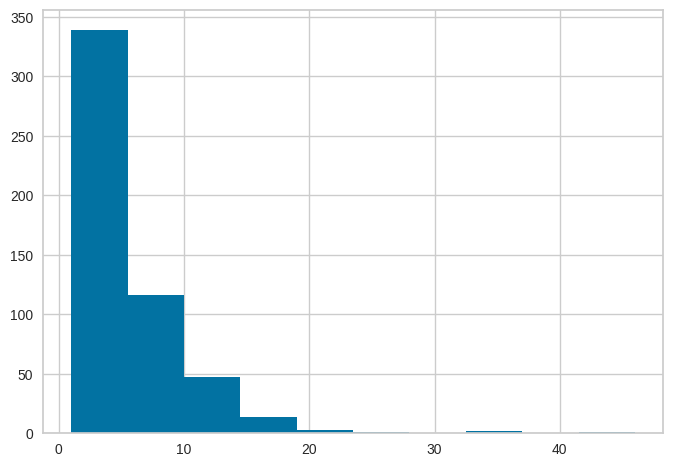

In [ ]:
get_config('X_train')['Frequency'].hist()

___

## Compare Models

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7746,0.7014,0.2679,0.5985,0.3535,0.2415,0.2768,0.2210
lda,Linear Discriminant Analysis,0.7745,0.7529,0.1442,0.5550,0.2229,0.1498,0.1933,0.0360
ridge,Ridge Classifier,0.7725,0.7528,0.0724,0.6667,0.1279,0.0890,0.1665,0.0430
lr,Logistic Regression,0.7705,0.7507,0.0397,0.5000,0.0736,0.0544,0.1164,1.1470
svm,SVM - Linear Kernel,0.7687,0.7516,0.0635,0.5333,0.1118,0.0726,0.1319,0.0380
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0320
gbc,Gradient Boosting Classifier,0.7575,0.6989,0.2846,0.4893,0.3505,0.2253,0.2434,0.2190
nb,Naive Bayes,0.7476,0.7125,0.2333,0.4906,0.2935,0.1642,0.1886,0.0350
rf,Random Forest Classifier,0.7443,0.6651,0.3327,0.4737,0.3806,0.2277,0.2379,0.2290
knn,K Neighbors Classifier,0.7364,0.6713,0.3013,0.4537,0.3531,0.1960,0.2073,0.0560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
tree_models = compare_models(include = ['dt', 'rf', 'et', 'xgboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7443,0.6651,0.3327,0.4737,0.3806,0.2277,0.2379,0.4180
lightgbm,Light Gradient Boosting Machine,0.7288,0.6674,0.2840,0.4119,0.3303,0.1691,0.1761,0.2620
xgboost,Extreme Gradient Boosting,0.7231,0.6560,0.3077,0.4178,0.3450,0.1766,0.1842,0.0690
et,Extra Trees Classifier,0.7174,0.6413,0.2923,0.3864,0.3214,0.1517,0.1582,0.2180
dt,Decision Tree Classifier,0.6963,0.5762,0.3083,0.3531,0.3201,0.1287,0.1332,0.0460


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
tree_models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
tree_models_results = pull()
tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7443,0.6651,0.3327,0.4737,0.3806,0.2277,0.2379,0.418
lightgbm,Light Gradient Boosting Machine,0.7288,0.6674,0.2840,0.4119,0.3303,0.1691,0.1761,0.262
xgboost,Extreme Gradient Boosting,0.7231,0.6560,0.3077,0.4178,0.3450,0.1766,0.1842,0.069
et,Extra Trees Classifier,0.7174,0.6413,0.2923,0.3864,0.3214,0.1517,0.1582,0.218
dt,Decision Tree Classifier,0.6963,0.5762,0.3083,0.3531,0.3201,0.1287,0.1332,0.046


In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.6506,0.6535,0.3923,0.3922,0.3178,0.1197,0.1466,0.0390
rf,Random Forest Classifier,0.7443,0.6651,0.3327,0.4737,0.3806,0.2277,0.2379,0.4150
dt,Decision Tree Classifier,0.6963,0.5762,0.3083,0.3531,0.3201,0.1287,0.1332,0.0360
xgboost,Extreme Gradient Boosting,0.7231,0.6560,0.3077,0.4178,0.3450,0.1766,0.1842,0.0670
knn,K Neighbors Classifier,0.7364,0.6713,0.3013,0.4537,0.3531,0.1960,0.2073,0.0490
et,Extra Trees Classifier,0.7174,0.6413,0.2923,0.3864,0.3214,0.1517,0.1582,0.1880
gbc,Gradient Boosting Classifier,0.7575,0.6989,0.2846,0.4893,0.3505,0.2253,0.2434,0.1400
lightgbm,Light Gradient Boosting Machine,0.7288,0.6674,0.2840,0.4119,0.3303,0.1691,0.1761,0.3380
ada,Ada Boost Classifier,0.7746,0.7014,0.2679,0.5985,0.3535,0.2415,0.2768,0.1290
nb,Naive Bayes,0.7476,0.7125,0.2333,0.4906,0.2935,0.1642,0.1886,0.0360


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                       

## Set Custom Metrics

In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7f70d833de10>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7f70d833e170>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7f70d833e3b0>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [ ]:
import numpy as np

def custom_metric(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (100), 0)
    fp = np.where((y_pred==1) & (y==0), -5, 0)
    return np.sum([tp,fp])

add_metric('custom_metric', 'Custom Metric', custom_metric)

,custom_metric
Name,Custom Metric
Display Name,Custom Metric
Score Function,<pycaret.internal.metrics.EncodedDecodedLabels...
Scorer,"make_scorer(custom_metric, response_method='pr..."
Target,pred
Args,{}
Greater is Better,True
Multiclass,True
Custom,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric,TT (Sec)
ada,Ada Boost Classifier,0.7746,0.7014,0.2679,0.5985,0.3535,0.2415,0.2768,0.0000,0.1650
lda,Linear Discriminant Analysis,0.7745,0.7529,0.1442,0.5550,0.2229,0.1498,0.1933,0.0000,0.0360
ridge,Ridge Classifier,0.7725,0.7528,0.0724,0.6667,0.1279,0.0890,0.1665,0.0000,0.0380
lr,Logistic Regression,0.7705,0.7507,0.0397,0.5000,0.0736,0.0544,0.1164,0.0000,0.0490
svm,SVM - Linear Kernel,0.7687,0.7516,0.0635,0.5333,0.1118,0.0726,0.1319,0.0000,0.0400
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0360
gbc,Gradient Boosting Classifier,0.7575,0.6989,0.2846,0.4893,0.3505,0.2253,0.2434,0.0000,0.4750
nb,Naive Bayes,0.7476,0.7125,0.2333,0.4906,0.2935,0.1642,0.1886,0.0000,0.0390
rf,Random Forest Classifier,0.7443,0.6651,0.3327,0.4737,0.3806,0.2277,0.2379,0.0000,0.2300
knn,K Neighbors Classifier,0.7364,0.6713,0.3013,0.4537,0.3531,0.1960,0.2073,0.0000,0.0500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

In [ ]:
remove_metric('custom_metric')

## Create Model

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7736,0.7260,0.0769,1.0000,0.1429,0.1117,0.2433
1,0.7736,0.6788,0.0769,1.0000,0.1429,0.1117,0.2433
2,0.7736,0.6721,0.0769,1.0000,0.1429,0.1117,0.2433
3,0.7885,0.7167,0.0833,1.0000,0.1538,0.1227,0.2557
4,0.7692,0.7844,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7500,0.7521,0.0000,0.0000,0.0000,-0.0368,-0.0767
6,0.7692,0.8438,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7885,0.7667,0.0833,1.0000,0.1538,0.1227,0.2557
8,0.7692,0.8062,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
results = pull()
print(type(results))
results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7736,0.7260,0.0769,1.0,0.1429,0.1117,0.2433
1,0.7736,0.6788,0.0769,1.0,0.1429,0.1117,0.2433
2,0.7736,0.6721,0.0769,1.0,0.1429,0.1117,0.2433
3,0.7885,0.7167,0.0833,1.0,0.1538,0.1227,0.2557
4,0.7692,0.7844,0.0000,0.0,0.0000,0.0000,0.0000
5,0.7500,0.7521,0.0000,0.0,0.0000,-0.0368,-0.0767
6,0.7692,0.8438,0.0000,0.0,0.0000,0.0000,0.0000
7,0.7885,0.7667,0.0833,1.0,0.1538,0.1227,0.2557
8,0.7692,0.8062,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:
lr_model = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7771,0.7021,0.0714,1.0000,0.1333,0.1047,0.2350
1,0.7701,0.7810,0.0488,0.6667,0.0909,0.0607,0.1345
2,0.7701,0.7983,0.0244,1.0000,0.0476,0.0368,0.1369
Mean,0.7725,0.7605,0.0482,0.8889,0.0906,0.0674,0.1688
Std,0.0033,0.0419,0.0192,0.1571,0.0350,0.0281,0.0468


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7736,0.7125,0.0769,1.0000,0.1429,0.1117,0.2433
1,0.7547,0.6827,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7547,0.6798,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7885,0.7292,0.0833,1.0000,0.1538,0.1227,0.2557
4,0.7692,0.7740,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7692,0.7542,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7692,0.8458,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7885,0.7625,0.0833,1.0000,0.1538,0.1227,0.2557
8,0.7692,0.7979,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
create_model('lr', probability_threshold = 0.66)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7736,0.7260,0.0769,1.0000,0.1429,0.1117,0.2433
1,0.7547,0.6788,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7547,0.6721,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7885,0.7167,0.0833,1.0000,0.1538,0.1227,0.2557
4,0.7692,0.7844,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7692,0.7521,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7692,0.8438,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7885,0.7667,0.0833,1.0000,0.1538,0.1227,0.2557
8,0.7692,0.8062,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=123,
                                                                   solver='lbfgs',
                                                                   tol=0.0001,
                                                                   verbose=0,
                                                                   warm_start=False),
                                     dual=False, fit_intercept=True,
                                     intercept_scaling=1, l1_ratio=None,
                                     max_iter=1000, multi_class='auto',
                                     n_jobs=None, penalty='l2',
                                     probability_threshold=0.66,
                                     random_state=123, solver='lbfgs',
                                     tol=0.0001, verbose=0, warm_start=False)

## Tune Model

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6792,0.5567,0.3077,0.3333,0.3200,0.1106,0.1107
1,0.5849,0.5077,0.2308,0.2000,0.2143,-0.0658,-0.0661
2,0.6604,0.5154,0.2308,0.2727,0.2500,0.0325,0.0326
3,0.6923,0.5312,0.2500,0.3000,0.2727,0.0796,0.0802
4,0.7115,0.6625,0.5833,0.4118,0.4828,0.2909,0.2994
5,0.7885,0.6396,0.2500,0.6000,0.3529,0.2513,0.2858
6,0.6923,0.4760,0.1667,0.2500,0.2000,0.0189,0.0195
7,0.7115,0.6198,0.3333,0.3636,0.3478,0.1631,0.1633
8,0.7692,0.6927,0.5000,0.5000,0.5000,0.3500,0.3500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
dt_tuned = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7547,0.6221,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7547,0.6346,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7547,0.5702,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7692,0.6875,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7692,0.6583,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7692,0.6875,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7692,0.6875,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7692,0.6458,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7692,0.7125,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7170,0.6471,0.3077,0.4000,0.3478,0.1710,0.1734
1,0.6226,0.5904,0.0769,0.1111,0.0909,-0.1373,-0.1410
2,0.7170,0.5971,0.1538,0.3333,0.2105,0.0658,0.0731
3,0.7308,0.6063,0.3333,0.4000,0.3636,0.1947,0.1960
4,0.8269,0.7250,0.5833,0.6364,0.6087,0.4979,0.4986
5,0.8077,0.7250,0.4167,0.6250,0.5000,0.3868,0.3990
6,0.8462,0.7885,0.5000,0.7500,0.6000,0.5094,0.5255
7,0.7115,0.6573,0.4167,0.3846,0.4000,0.2105,0.2108
8,0.8077,0.6958,0.5000,0.6000,0.5455,0.4248,0.4276


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [ ]:
dt_tuned, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7547,0.6221,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7547,0.6346,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7547,0.5702,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7692,0.6875,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7692,0.6583,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7692,0.6875,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7692,0.6875,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7692,0.6458,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7692,0.7125,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
dt_tuned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['Recency',
                                                                          'Frequency',
                                                                          'Monetary',
                                                                          'Time'],
                                                                 transformer=SimpleImputer(add_indicator=False,
                                                                                           copy=True,
                                                                                           fill_value=None,
                                                                                           keep_empty_features=F...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

## Ensemble Model

In [ ]:
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6981,0.5192,0.3077,0.3636,0.3333,0.1400,0.1408
1,0.6038,0.5615,0.3077,0.2500,0.2759,0.0071,0.0072
2,0.6792,0.5808,0.2308,0.3000,0.2609,0.0605,0.0613
3,0.7692,0.5906,0.2500,0.5000,0.3333,0.2121,0.2308
4,0.8269,0.6698,0.5000,0.6667,0.5714,0.4658,0.4733
5,0.8269,0.7042,0.3333,0.8000,0.4706,0.3874,0.4407
6,0.7500,0.7594,0.3333,0.4444,0.3810,0.2283,0.2320
7,0.8269,0.7292,0.4167,0.7143,0.5263,0.4293,0.4526
8,0.8077,0.7906,0.5833,0.5833,0.5833,0.4583,0.4583


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6604,0.6577,0.4615,0.3529,0.4000,0.1690,0.1719
1,0.6038,0.5413,0.3077,0.2500,0.2759,0.0071,0.0072
2,0.7170,0.6106,0.3846,0.4167,0.4000,0.2152,0.2155
3,0.7308,0.5760,0.2500,0.3750,0.3000,0.1415,0.1460
4,0.7308,0.6406,0.3333,0.4000,0.3636,0.1947,0.1960
5,0.7692,0.6458,0.2500,0.5000,0.3333,0.2121,0.2308
6,0.6923,0.5167,0.1667,0.2500,0.2000,0.0189,0.0195
7,0.8077,0.7375,0.5000,0.6000,0.5455,0.4248,0.4276
8,0.8077,0.7667,0.4167,0.6250,0.5000,0.3868,0.3990


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

## Blend Models

In [ ]:
best_recall_models_top3

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                       

In [ ]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6792,0.5933,0.3077,0.3333,0.3200,0.1106,0.1107
1,0.6038,0.5846,0.1538,0.1667,0.1600,-0.0987,-0.0989
2,0.6792,0.6029,0.3077,0.3333,0.3200,0.1106,0.1107
3,0.7500,0.5333,0.2500,0.4286,0.3158,0.1756,0.1852
4,0.6923,0.6948,0.5833,0.3889,0.4667,0.2624,0.2731
5,0.7885,0.6750,0.2500,0.6000,0.3529,0.2513,0.2858
6,0.7308,0.7542,0.1667,0.3333,0.2222,0.0808,0.0879
7,0.7500,0.7229,0.3333,0.4444,0.3810,0.2283,0.2320
8,0.7500,0.7542,0.4167,0.4545,0.4348,0.2747,0.2751


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Quadratic Discriminant Analysis',
                              QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=False,
                                                            tol=0.0001)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurit...
                             ('Decision Tree Classifier',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     random_state=123,
                                                     splitter='best'))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## Stack Models

In [ ]:
# list stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7358,0.5548,0.2308,0.4286,0.3000,0.1549,0.1662
1,0.7170,0.5442,0.0769,0.2500,0.1176,0.0025,0.0031
2,0.7358,0.6048,0.0769,0.3333,0.1250,0.0364,0.0501
3,0.7500,0.5312,0.2500,0.4286,0.3158,0.1756,0.1852
4,0.7692,0.6927,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7500,0.6833,0.0833,0.3333,0.1333,0.0452,0.0602
6,0.7692,0.7667,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7692,0.7521,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Quadratic Discriminant Analysis',
                                QuadraticDiscriminantAnalysis(priors=None,
                                                              reg_param=0.0,
                                                              store_covariance=False,
                                                              tol=0.0001)),
                               ('Random Forest Classifier',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_...
                                                       monotonic_cst=None,
                                                       random_state=123,
                                                       splitter='best'))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

## Plot Model

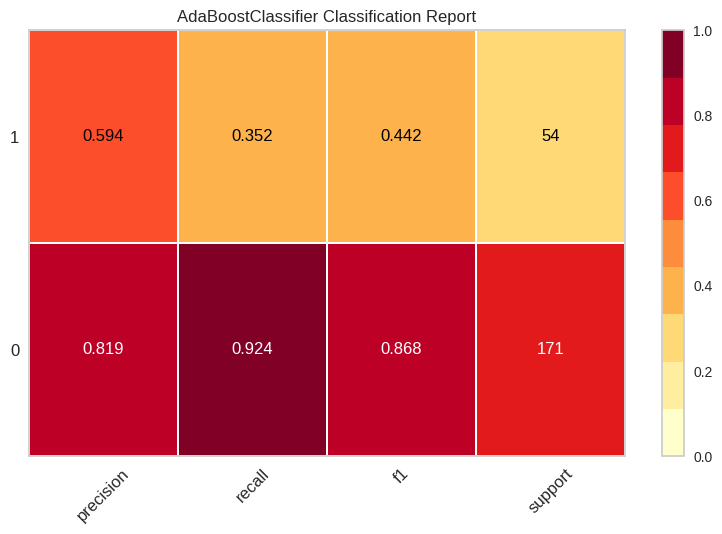

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

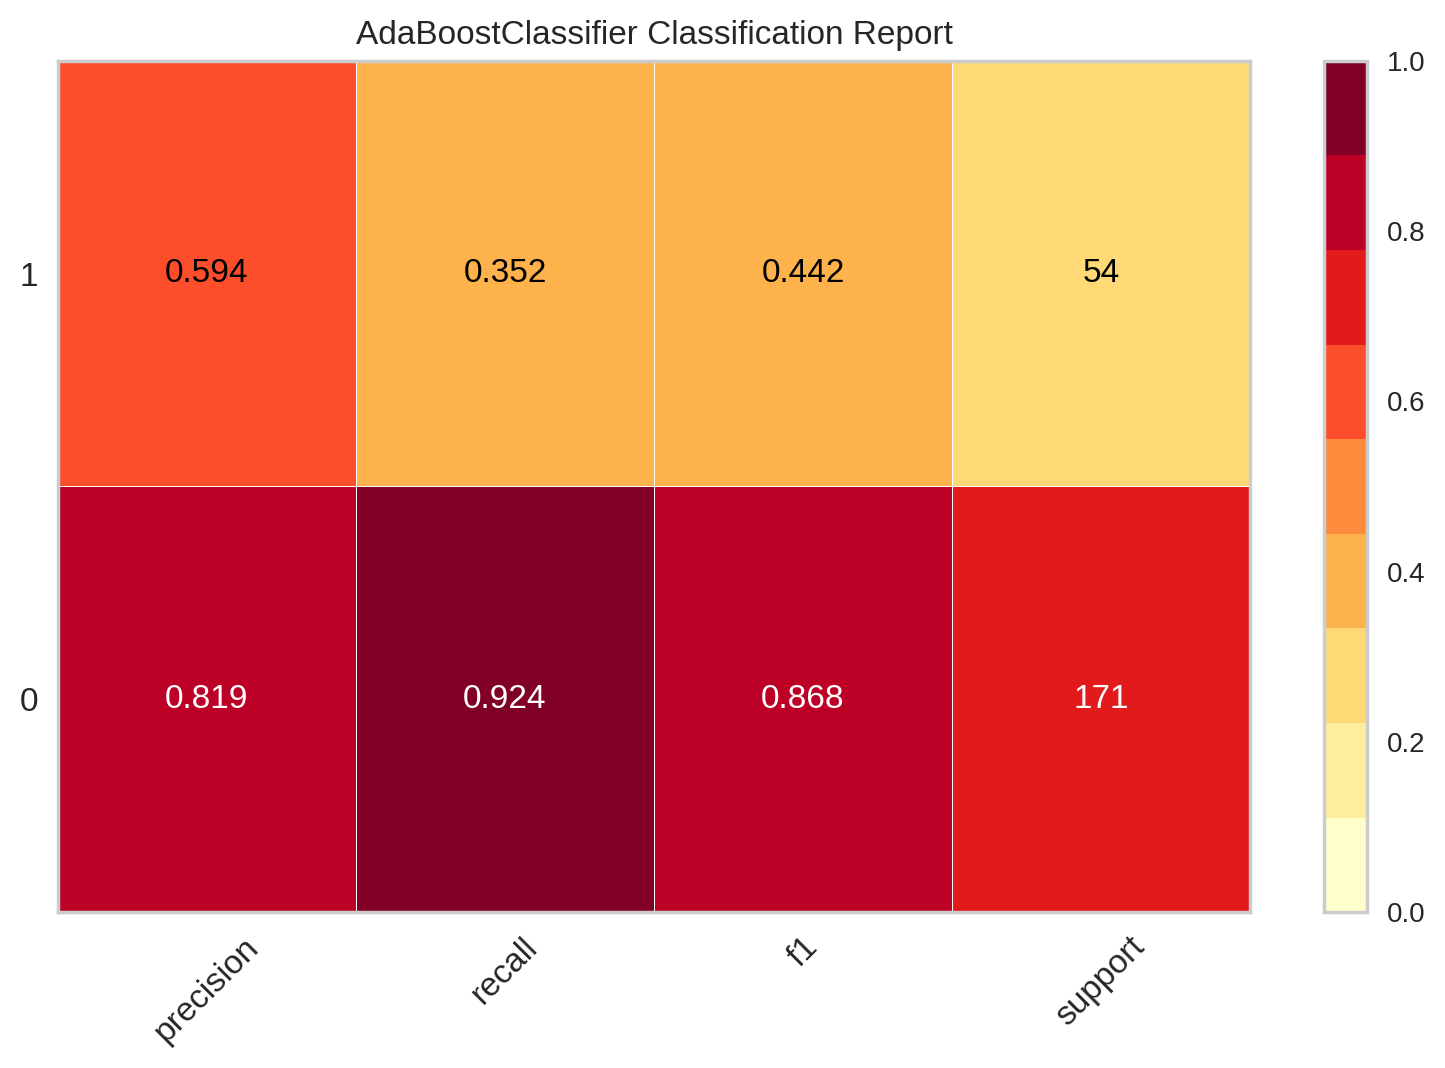

In [ ]:
plot_model(best, plot = 'class_report', scale = 2)

In [ ]:
# Save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

## Calibrate Model

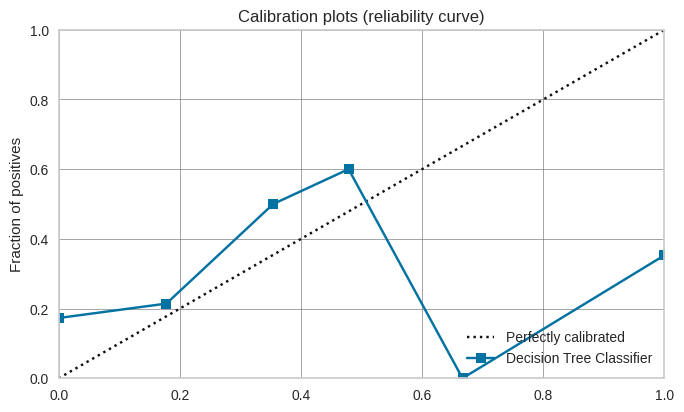

In [ ]:
# check calbiration
plot_model(dt, plot = 'calibration')

In [ ]:
# calibrate default dt
calibrated_dt = calibrate_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7547,0.5452,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7547,0.5433,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7547,0.5442,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7692,0.5427,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7692,0.6073,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7692,0.6875,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7692,0.5896,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7692,0.6094,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7692,0.7917,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

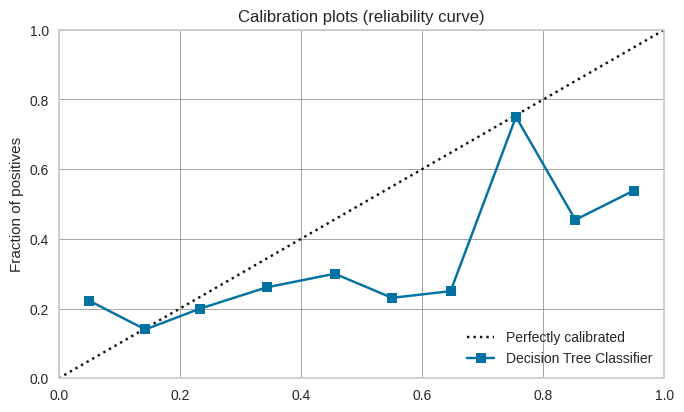

In [ ]:
# check calbiration of calibrated dt
plot_model(calibrated_dt, plot = 'calibration')

## Get Leaderboard

In [ ]:
lb = get_leaderboard()
lb

Processing:   0%|          | 0/68 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Custom Metric
Index,,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.7705,0.7507,0.0397,0.5000,0.0736,0.0544,0.1164,NaN
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7364,0.6713,0.3013,0.4537,0.3531,0.1960,0.2073,NaN
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.7476,0.7125,0.2333,0.4906,0.2935,0.1642,0.1886,NaN
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.6963,0.5762,0.3083,0.3531,0.3201,0.1287,0.1332,NaN
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.7687,0.7516,0.0635,0.5333,0.1118,0.0726,0.1319,NaN
...,...,...,...,...,...,...,...,...,...,...
62,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7558,0.6642,0.3494,0.5222,0.4069,0.2615,0.2761,NaN
63,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7193,0.6294,0.3301,0.4070,0.3579,0.1826,0.1870,NaN
64,Voting Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7193,0.6622,0.3000,0.4083,0.3307,0.1621,0.1725,NaN


In [ ]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Recency', 'Frequency', 'Monetary',
                                             'Time'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=123,
                                        splitter='best')]],
         verbose=False)

## AutoML

In [ ]:
automl()

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

## Create App

In [ ]:
from pycaret.classification import *
from pycaret.classification import create_app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://75878f932cd95d69c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Create API

In [ ]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


## Finalize Model

In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Recency', 'Frequency', 'Monetary',
                                             'Time'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('actual_estimator',
                 AdaBoostClassifier(algorithm='SAMME.R', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)

## Save / Load Model

In [ ]:
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Recency', 'Frequency', 'Monetary',
                                              'Time'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],...
                                                               fill_value=None,
                                                    

In [ ]:
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Recency', 'Frequency', 'Monetary',
                                             'Time'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None,...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 AdaBoostClassifier(algorithm='SAMME.R', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)

## Save / Load Experiment

In [ ]:
save_experiment('my_experiment')

In [ ]:
# load the experiment from disk
exp_from_disk = load_experiment('my_experiment', data=concreteData)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(748, 5)"
4,Transformed data shape,"(748, 5)"
5,Transformed train set shape,"(523, 5)"
6,Transformed test set shape,"(225, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple
